In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [4]:
df = pd.read_csv("C:/Users/sandh/OneDrive/Desktop/IRIS (1).csv")

In [5]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [6]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


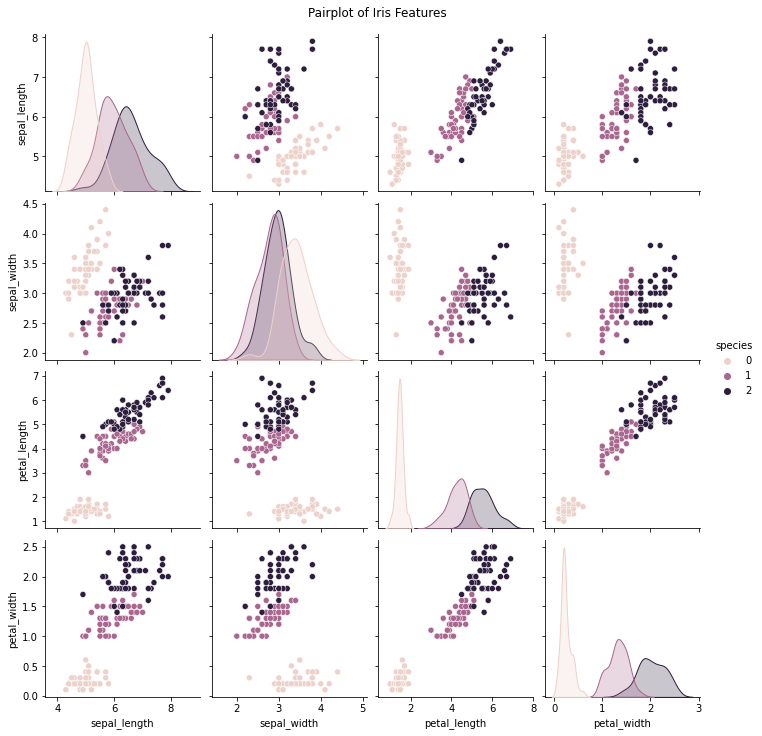

In [17]:
# Visualizations
sns.pairplot(df, hue='species')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()


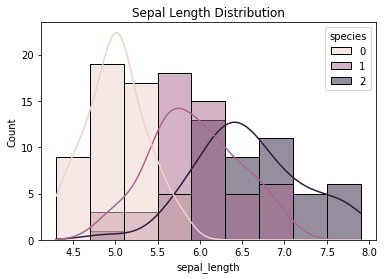

In [18]:
sns.histplot(data=df, x='sepal_length', hue='species', kde=True)
plt.title('Sepal Length Distribution')
plt.show()

In [7]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # setosa=0, versicolor=1, virginica=2

In [8]:
X = df.drop('species', axis=1)
y = df['species']

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Model training and evaluation function
def train_and_evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

In [20]:
# Train and evaluate models
log_reg = LogisticRegression(max_iter=200)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)


Logistic Regression Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Logistic Regression Accuracy: 1.0


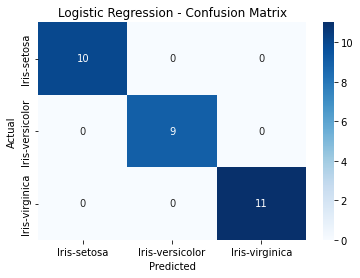


K-Nearest Neighbors Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

K-Nearest Neighbors Accuracy: 1.0


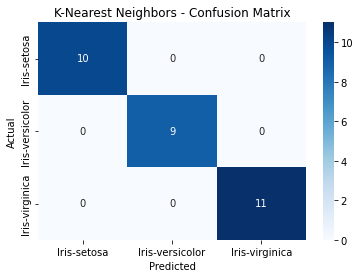


Decision Tree Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Decision Tree Accuracy: 1.0


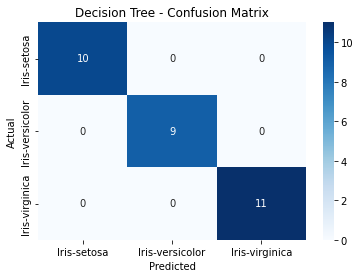

In [21]:
train_and_evaluate(log_reg, "Logistic Regression")
train_and_evaluate(knn, "K-Nearest Neighbors")
train_and_evaluate(dt, "Decision Tree")

In [23]:
# Predict on a sample input
sample = np.array([[5.1, 3.5, 1.4, 0.2]])
pred_species = le.inverse_transform(log_reg.predict(sample))
print("\nSample Prediction using Logistic Regression (5.1, 3.5, 1.4, 0.2):", pred_species[0])


Sample Prediction using Logistic Regression (5.1, 3.5, 1.4, 0.2): Iris-setosa


In [24]:
import joblib

# Save the models
joblib.dump(log_reg, "logistic_model.pkl")
joblib.dump(knn, "knn_model.pkl")
joblib.dump(dt, "dt_model.pkl")

# Save the label encoder
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']